# Ceneo analyzer

## Loading libraries

In [53]:
import os
import pandas as pd
from matplotlib import pyplot as plt

## Listing codes for all products for which opinions have been extracted

In [54]:
print(*[filename.split(".")[0] for filename in os.listdir("opinions")], sep="\n")

13029872


## Specifying opinions about which product are to be analyzed

In [55]:
product_id = input("Please provide Ceneo.pl product code: ")

## Importing opinions from JSON file to pandas.DataFrame object

In [56]:
opinions = pd.read_json(f"opinions/{product_id}.json")

In [57]:
opinions

,opinion_id,author,recommendation,score,content,pros,cons,helpful,unhelpful,publish_date,purchase_date
0,14225294,A...k,NaN,0.6,The color does not match the order. It was sup...,"[functionality, comfortable]",None,1,2,2021-03-18 19:50:23,2021-04-02 22:28:44
1,14089388,p...a,1.0,0.8,Quite a nice piece of furniture. Easy to assem...,"[functionality, appearance, comfortable, resil...",None,0,1,2021-02-07 13:43:59,2021-03-10 14:00:26
2,12038573,Użytkownik Ceneo,NaN,0.7,"solid workmanship, but the elements of the arm...",None,None,3,2,2020-03-20 17:29:35,2020-04-01 22:29:48
3,15861753,e...t,1.0,1.0,Very accurate workmanship and easy assembly. T...,"[functionality, appearance, comfortable, resil...",None,0,0,2022-03-05 16:46:14,2022-03-23 19:34:15
4,11521241,Ayla,1.0,1.0,"The armchair looks very good in real life, loo...",None,None,0,2,2019-12-13 10:38:44,2020-01-02 16:00:48
5,11470206,Użytkownik Ceneo,1.0,0.9,Very nice and comfortable armchair. Warms up t...,"[large tilt angle, functionality, not accurate...",None,0,0,2019-11-20 20:45:13,2019-12-21 18:23:25
6,11210924,Ewa,1.0,0.8,"Currently, I cannot evaluate the seats because...","[functionality, appearance]",None,0,4,2019-10-05 14:08:28,2019-10-29 08:42:13
7,10831402,Łasica,1.0,0.8,Some elements not fully painted. Poor quality ...,None,None,0,2,2019-07-17 19:36:31,2019-07-25 10:39:09
8,13962086,a...0,0.0,0.4,The price of the armchair does not correspond ...,"[functionality, fear of capsizing, appearance,...","[not accurate and not clear instructions, I do...",1,1,2021-01-28 18:40:12,2021-02-16 09:55:21
9,18511128,j...p,0.0,0.4,"Hello !!! In general, it should be ***** not c...",None,None,0,0,2024-03-15 23:15:20,2024-03-21 08:05:07


## Basic statistics

In [58]:
MAX_SCORE = 5
opinions_count = opinions.shape[0]
pros_count = opinions.pros.apply(lambda p: None if not p else p).count()
cons_count = opinions.cons.apply(lambda p: None if not p else p).count()
average_score = opinions.score.mean() * MAX_SCORE   

In [59]:
opinions_count

10

In [60]:
pros_count

6

In [61]:
cons_count

1

In [62]:
average_score

3.7000000000000006

## Basic charts

### Score histogram

<Axes: xlabel='score'>

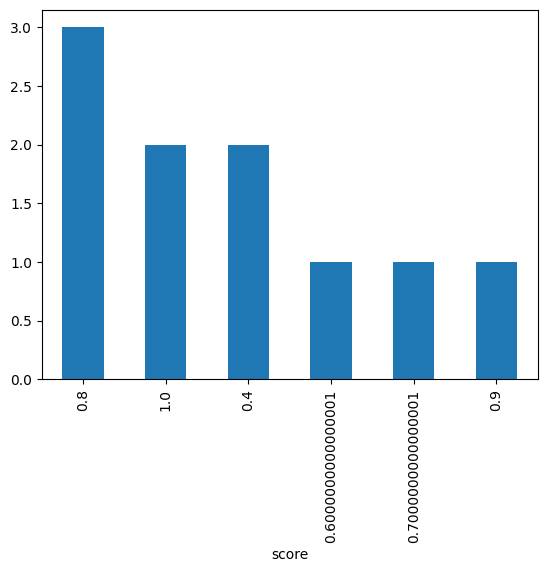

In [64]:
score_distribution = opinions.score.value_counts()
score_distribution.plot.bar()